In [1]:
#import spark
from pyspark.sql import SparkSession

In [2]:
#start spark
spark = SparkSession.builder.appName("Project_Spark").config("spark-master", "local").getOrCreate()

In [3]:
#Data preprocessing.
#First, my data exists in 10 blocks, all CSV files, with the same column name and a similar number.
#If we want to process all the data, I need to put all the CSV files together into a CSV file with all the data.
'''
#get the data
Folder_Path = '/Users/KarpKong/VisualStudioCode/CSCI316/Project/Data' #The folder to be spliced and its full path, be careful not to include Chinese
SaveFile_Path = '/Users/KarpKong/VisualStudioCode/CSCI316/Project/MergeData'#The file path to save after splicing
SaveFile_Name = 'Data.csv'#The file name to save after the merge
#Modify the current working directory
os.chdir(Folder_Path)
#Saves all filenames in this folder into a list
file_list = os.listdir()
#Read the first CSV file and include the table header
df = pd.read_csv(Folder_Path +'/'+ file_list[0])
#Write the first read CSV file to the merged file to save
df.to_csv(SaveFile_Path+'/'+ SaveFile_Name,encoding="utf_8_sig",index=False)
#Loop through each CSV file name in the list and append it to the merged file
for i in range(1,len(file_list)):
    df = pd.read_csv(Folder_Path + '/'+ file_list[i])
    df.to_csv(SaveFile_Path+'/'+ SaveFile_Name,encoding="utf_8_sig",index=False, header=False, mode='a+')

'''

'\n#get the data\nFolder_Path = \'/Users/KarpKong/VisualStudioCode/CSCI316/Project/Data\' #The folder to be spliced and its full path, be careful not to include Chinese\nSaveFile_Path = \'/Users/KarpKong/VisualStudioCode/CSCI316/Project/MergeData\'#The file path to save after splicing\nSaveFile_Name = \'Data.csv\'#The file name to save after the merge\n#Modify the current working directory\nos.chdir(Folder_Path)\n#Saves all filenames in this folder into a list\nfile_list = os.listdir()\n#Read the first CSV file and include the table header\ndf = pd.read_csv(Folder_Path +\'/\'+ file_list[0])\n#Write the first read CSV file to the merged file to save\ndf.to_csv(SaveFile_Path+\'/\'+ SaveFile_Name,encoding="utf_8_sig",index=False)\n#Loop through each CSV file name in the list and append it to the merged file\nfor i in range(1,len(file_list)):\n    df = pd.read_csv(Folder_Path + \'/\'+ file_list[i])\n    df.to_csv(SaveFile_Path+\'/\'+ SaveFile_Name,encoding="utf_8_sig",index=False, header=F

In [4]:
#Read the merged Dataset
Data = spark.read.csv("/Users/KarpKong/VisualStudioCode/CSCI316/Project/MergeData/Data.csv",inferSchema = 'true',header = 'true')
Data.show(10)

+-----+-----+------------+------------+------------+------------+-------+------+------+------+-------+--------+
| id_1| id_2|cmp_fname_c1|cmp_fname_c2|cmp_lname_c1|cmp_lname_c2|cmp_sex|cmp_bd|cmp_bm|cmp_by|cmp_plz|is_match|
+-----+-----+------------+------------+------------+------------+-------+------+------+------+-------+--------+
|  607|53170|           1|           ?|         1.0|           ?|      1|     1|     1|     1|      1|    true|
|88569|88592|           1|           ?|         1.0|           ?|      1|     1|     1|     1|      1|    true|
|21282|26255|           1|           ?|         1.0|           ?|      1|     1|     1|     1|      1|    true|
|20995|42541|           1|           ?|         1.0|           ?|      1|     1|     1|     1|      1|    true|
|27989|34739|           1|           ?|         1.0|           ?|      1|     1|     1|     1|      1|    true|
|32442|69159|           1|           ?|         1.0|           ?|      1|     1|     1|     1|      1|  

In [5]:
#View data types
Data.printSchema()

root
 |-- id_1: integer (nullable = true)
 |-- id_2: integer (nullable = true)
 |-- cmp_fname_c1: string (nullable = true)
 |-- cmp_fname_c2: string (nullable = true)
 |-- cmp_lname_c1: double (nullable = true)
 |-- cmp_lname_c2: string (nullable = true)
 |-- cmp_sex: integer (nullable = true)
 |-- cmp_bd: string (nullable = true)
 |-- cmp_bm: string (nullable = true)
 |-- cmp_by: string (nullable = true)
 |-- cmp_plz: string (nullable = true)
 |-- is_match: boolean (nullable = true)



In [6]:
#Get the total number of data
num = Data.count()
num

5749132

In [7]:
Data.filter(Data.cmp_fname_c2 == '?').count()

5645434

In [8]:
Data.filter(Data.cmp_lname_c2 == '?').count()

5746668

In [9]:
#“id_1” and“id_2” should not be used for prediction
#"cmp_fname_c2"and 'cmp_lname_c2'Because there are too many missing values, a cannot be a data that can participate in the training, 
#because the missing value has exceeded 90% of the overall data, so if the average value is used instead, the pollution data will be caused, and the column will be deleted directly.
td = Data.drop("id_1","id_2","cmp_fname_c2",'cmp_lname_c2')
td.printSchema()

root
 |-- cmp_fname_c1: string (nullable = true)
 |-- cmp_lname_c1: double (nullable = true)
 |-- cmp_sex: integer (nullable = true)
 |-- cmp_bd: string (nullable = true)
 |-- cmp_bm: string (nullable = true)
 |-- cmp_by: string (nullable = true)
 |-- cmp_plz: string (nullable = true)
 |-- is_match: boolean (nullable = true)



In [10]:
cleanData = td.filter((td.cmp_fname_c1 !="?")&(td.cmp_fname_c1 !="?")&(td.cmp_bd !="?")&(td.cmp_bm !="?")&(td.cmp_by !="?")&(td.cmp_plz !="?"))
cleanData.count()
#14,644 pieces of data were deleted

5734488

In [11]:
cleanData.printSchema()

root
 |-- cmp_fname_c1: string (nullable = true)
 |-- cmp_lname_c1: double (nullable = true)
 |-- cmp_sex: integer (nullable = true)
 |-- cmp_bd: string (nullable = true)
 |-- cmp_bm: string (nullable = true)
 |-- cmp_by: string (nullable = true)
 |-- cmp_plz: string (nullable = true)
 |-- is_match: boolean (nullable = true)



In [12]:
#Exported cleanData
#cleanData.rdd.map(lambda x:",".join(map(str,x))).coalesce(1).saveAsTextFile('cleanData.csv')

In [13]:
#Reread, change data type
cleanData = spark.read.csv("/Users/KarpKong/VisualStudioCode/CSCI316/Project/MergeData/cleanData.csv",inferSchema = 'true')

In [14]:
df = cleanData.selectExpr("_c0 as cmp_fname_c1", "_c1 as cmp_lname_c1","_c2 as cmp_sex","_c3 as cmp_bd","_c4 as cmp_bm","_c5 as cmp_by","_c6 as cmp_plz","_c7 as is_match")
df.show(5)
df.printSchema()
df.count()

+------------+------------+-------+------+------+------+-------+--------+
|cmp_fname_c1|cmp_lname_c1|cmp_sex|cmp_bd|cmp_bm|cmp_by|cmp_plz|is_match|
+------------+------------+-------+------+------+------+-------+--------+
|         1.0|         1.0|      1|     1|     1|     1|      1|    true|
|         1.0|         1.0|      1|     1|     1|     1|      1|    true|
|         1.0|         1.0|      1|     1|     1|     1|      1|    true|
|         1.0|         1.0|      1|     1|     1|     1|      1|    true|
|         1.0|         1.0|      1|     1|     1|     1|      1|    true|
+------------+------------+-------+------+------+------+-------+--------+
only showing top 5 rows

root
 |-- cmp_fname_c1: double (nullable = true)
 |-- cmp_lname_c1: double (nullable = true)
 |-- cmp_sex: integer (nullable = true)
 |-- cmp_bd: integer (nullable = true)
 |-- cmp_bm: integer (nullable = true)
 |-- cmp_by: integer (nullable = true)
 |-- cmp_plz: integer (nullable = true)
 |-- is_match: bool

5734488

In [15]:
#Start data preprocessing of adaptive model

#Change the target data type from Boolean to String
from pyspark.sql.types import StringType
cdf = df.withColumn("is_match", df["is_match"].cast(StringType()))#trap！！ lable must be String
cdf.printSchema()

root
 |-- cmp_fname_c1: double (nullable = true)
 |-- cmp_lname_c1: double (nullable = true)
 |-- cmp_sex: integer (nullable = true)
 |-- cmp_bd: integer (nullable = true)
 |-- cmp_bm: integer (nullable = true)
 |-- cmp_by: integer (nullable = true)
 |-- cmp_plz: integer (nullable = true)
 |-- is_match: string (nullable = true)



In [16]:
#old split not using
#total_data = df['cmp_fname_c1','cmp_lname_c1','cmp_sex','cmp_bd','cmp_bm','cmp_by','cmp_plz']
#t = df['cmp_fname_c1','is_match']
#total_target = t.drop(t['cmp_fname_c1'])
#training_Data,test_Data = total_data.randomSplit([0.7,0.3])
#training_target,test_traget = total_target.randomSplit([0.7,0.3])

In [17]:
#Encapsulates the data format so that the data exists in the features and labels. 
#The inputs are one array of vector types. 
#Label is the target, String type
from pyspark.ml.feature import OneHotEncoderEstimator,VectorAssembler,StringIndexer

label_stringIdx = StringIndexer(inputCol = 'is_match', outputCol = 'label')
numericCols = ['cmp_fname_c1', 'cmp_lname_c1', 'cmp_sex', 'cmp_bd', 'cmp_bm', 'cmp_by','cmp_plz']
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")
stages = []
stages +=[label_stringIdx]
stages +=[assembler]

In [18]:
from pyspark.ml import Pipeline
cols = cdf.columns
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(cdf)
df1 = pipelineModel.transform(cdf)
selectedCols = ['label','features'] + cols
df2 = df1.select(selectedCols)
df2.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- cmp_fname_c1: double (nullable = true)
 |-- cmp_lname_c1: double (nullable = true)
 |-- cmp_sex: integer (nullable = true)
 |-- cmp_bd: integer (nullable = true)
 |-- cmp_bm: integer (nullable = true)
 |-- cmp_by: integer (nullable = true)
 |-- cmp_plz: integer (nullable = true)
 |-- is_match: string (nullable = true)



In [19]:
#Split train and test Data
train, test = df2.randomSplit([0.7, 0.3], seed = 2000)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 4013672
Test Dataset Count: 1720816


In [20]:
#Logistic Regression Model
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)#save trained data in lrModel

from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

result = lrModel.transform(test)
results = result.select(['prediction', 'label'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)

cm=metrics.confusionMatrix().toArray()
accuracy=(cm[0][0]+cm[1][1])/cm.sum()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
F_score = precision*recall*2/(precision+recall)
print('Test set accuracy = '+str(accuracy))
print('Test set precision = '+str(precision))
print('Test set recall = '+str(recall))
print('Test set F-score = '+str(F_score))

Test set accuracy = 0.9997152513691179
Test set precision = 0.9998425319004125
Test set recall = 0.9998716889179469
Test set F-score = 0.9998571101966164


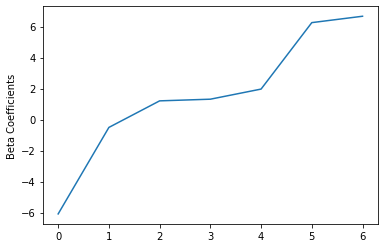

In [33]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

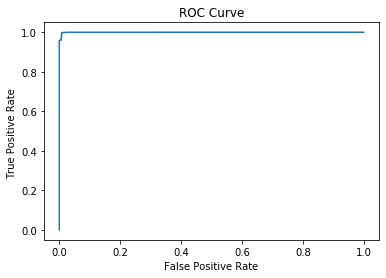

Training set areaUnderROC: 0.9996184748492919


In [22]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('True Positive Rate ')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

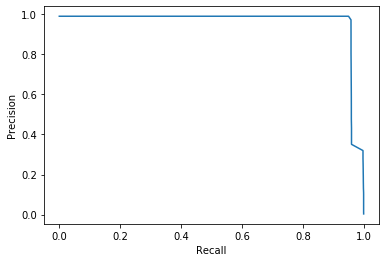

In [23]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [24]:
predictions = lrModel.transform(test)
predictions.select('cmp_fname_c1','cmp_lname_c1','cmp_sex','cmp_bd','cmp_bm','cmp_by','cmp_plz').show(10)

+------------------+-------------------+-------+------+------+------+-------+
|      cmp_fname_c1|       cmp_lname_c1|cmp_sex|cmp_bd|cmp_bm|cmp_by|cmp_plz|
+------------------+-------------------+-------+------+------+------+-------+
|0.0833333333333334|                0.4|      1|     0|     0|     0|      0|
|0.0833333333333334|  0.833333333333333|      1|     0|     0|     0|      0|
|0.0909090909090909|0.42857142857142894|      1|     0|     0|     0|      0|
|0.0909090909090909|                0.5|      1|     0|     0|     0|      0|
|0.0909090909090909|                0.6|      1|     0|     0|     0|      0|
|0.0909090909090909| 0.7142857142857142|      1|     0|     0|     0|      0|
|0.0909090909090909|                0.8|      1|     0|     0|     0|      0|
|0.0909090909090909|              0.875|      1|     0|     0|     0|      0|
|0.0909090909090909|                1.0|      1|     0|     0|     0|      0|
|0.0909090909090909|                1.0|      1|     0|     0|  

In [25]:
# Fit the model
lrModel = lr.fit(train)
# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: [1.9671124003179958,6.255132980419243,-6.088472358503153,1.2065381782466824,-0.506904672603796,1.3142524576518801,6.666739546158819]
Intercept: -8.004785098323678


In [26]:
# We can also use the multinomial family for binary classification
mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")
# Fit the model
mlrModel = mlr.fit(train)
# Print the coefficients and intercepts for logistic regression with multinomial family
print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
print("Multinomial intercepts: " + str(mlrModel.interceptVector))

Multinomial coefficients: 2 X 7 CSRMatrix

Multinomial intercepts: [2.80454485005525,-2.80454485005525]


In [27]:
#Decision Tree Classifier
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 10)
dtModel = dt.fit(train)

result = dtModel.transform(test)
results = result.select(['prediction', 'label'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)

cm=metrics.confusionMatrix().toArray()
accuracy=(cm[0][0]+cm[1][1])/cm.sum()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
F_score = precision*recall*2/(precision+recall)
print('Test set accuracy = '+str(accuracy))
print('Test set precision = '+str(precision))
print('Test set recall = '+str(recall))
print('Test set F-score = '+str(F_score))

Test set accuracy = 0.9999866342479382
Test set precision = 0.9999912515528494
Test set recall = 0.9999953341424708
Test set F-score = 0.9999932928434933


In [28]:
#Random Forest Classifier
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)

result = rfModel.transform(test)
results = result.select(['prediction', 'label'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)

cm=metrics.confusionMatrix().toArray()
accuracy=(cm[0][0]+cm[1][1])/cm.sum()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
F_score = precision*recall*2/(precision+recall)
print('Test set accuracy = '+str(accuracy))
print('Test set precision = '+str(precision))
print('Test set recall = '+str(recall))
print('Test set F-score = '+str(F_score))

Test set accuracy = 0.9999761740941506
Test set precision = 0.9999772544353851
Test set recall = 0.9999988335356177
Test set F-score = 0.9999880438690857


In [29]:
#NaiveBayes
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")
# train the model
nbModel = nb.fit(train)

result = nbModel.transform(test)
results = result.select(['prediction', 'label'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)

cm=metrics.confusionMatrix().toArray()
accuracy=(cm[0][0]+cm[1][1])/cm.sum()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
F_score = precision*recall*2/(precision+recall)
print('Test set accuracy = '+str(accuracy))
print('Test set precision = '+str(precision))
print('Test set recall = '+str(recall))
print('Test set F-score = '+str(F_score))

Test set accuracy = 0.9963575420033286
Test set precision = 0.9964181953120959
Test set recall = 0.9999387606199291
Test set F-score = 0.998175373716532


In [ ]:
#Not using below

In [30]:
#cleanData = MLUtils.loadLibSVMFile(sc,"/Users/KarpKong/VisualStudioCode/CSCI316/Project/MergeData/cleanData.csv")

In [31]:
from tempfile import NamedTemporaryFile
from pyspark.mllib.util import MLUtils
#Initializing PySpark
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("pyspark")
sc = SparkContext.getOrCreate(conf=conf)

In [32]:
DD = MLUtils.loadLibSVMFile(sc,"/Users/KarpKong/VisualStudioCode/CSCI316/Project/MergeData/Data.csv")

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 144.0 failed 1 times, most recent failure: Lost task 2.0 in stage 144.0 (TID 481, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 377, in main
    process()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 372, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 393, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 99, in wrapper
    return f(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark/mllib/util.py", line 123, in <lambda>
    parsed = lines.map(lambda l: MLUtils._parse_libsvm_line(l))
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/mllib/util.py", line 48, in _parse_libsvm_line
    label = float(items[0])
ValueError: could not convert string to float: '9910,50216,0.111111111111111,?,0.8,?,1,0,1,0,0,False'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:452)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:588)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:571)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:406)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at org.apache.spark.storage.memory.MemoryStore.putIterator(MemoryStore.scala:221)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsBytes(MemoryStore.scala:349)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1182)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1091)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:882)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 377, in main
    process()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 372, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 393, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 99, in wrapper
    return f(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark/mllib/util.py", line 123, in <lambda>
    parsed = lines.map(lambda l: MLUtils._parse_libsvm_line(l))
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/mllib/util.py", line 48, in _parse_libsvm_line
    label = float(items[0])
ValueError: could not convert string to float: '9910,50216,0.111111111111111,?,0.8,?,1,0,1,0,0,False'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:452)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:588)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:571)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:406)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at org.apache.spark.storage.memory.MemoryStore.putIterator(MemoryStore.scala:221)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsBytes(MemoryStore.scala:349)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1182)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1091)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:882)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [ ]:
#swap to json
cleanData.toJSON().first()

In [ ]:
pd.DataFrame(df2.take(10), columns=df2.columns).transpose()

In [ ]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testErr = labelsAndPredictions.filter(lambda (v, p): v != p).count() / float(testData.count())
print('Test Error = ' + str(testErr))
print('Learned classification tree model:')
print(model.toDebugString())

# Save and load model
model.save(sc, "myModelPath")
sameModel = DecisionTreeModel.load(sc, "myModelPath")

In [ ]:
# Make prediction and test accuracy.
predictionAndLabel = test.map(lambda p: (model.predict(p.features), p.label))
accuracy = 1.0 * predictionAndLabel.filter(lambda pl: pl[0] == pl[1]).count() / test.count()
print('model accuracy {}'.format(accuracy))

In [ ]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

In [ ]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()